In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
pd.isnull(df).sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
target = df.target
text = df.text

In [ ]:
# Questions:
# 1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)
# 2. Build a BOW and train a KNN, Decision Tree, and SVM model
# 3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)
# 4. Use one of the word embeddings (word2vec, Glove, fasText) and build a CNN model
# and compare the result with question 2.
# 5. Build an API or a user interface to use the trained CNN model in production (this
# question is optional)


In [7]:
#Tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

text = text.apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
#remove stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text = text.apply(lambda x: [item for item in x if item not in stop_words])

#Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

text = text.apply(lambda x: [ps.stem(item) for item in x])

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


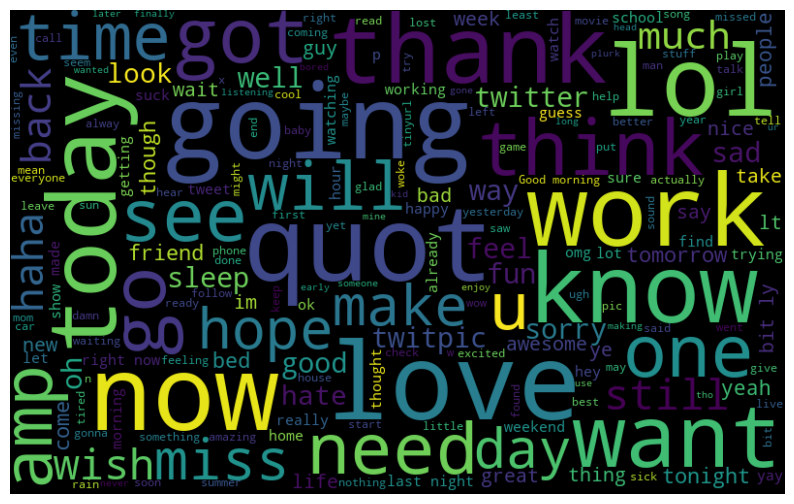

In [13]:
# visualization 

import matplotlib.pyplot as plt
import seaborn as sns

#wordcloud
%pip install wordcloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Building a BOW

from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=1000, ngram_range=(1,3))
bow.fit(df['text'])

In [14]:
word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'my': 5,
 'and': 6,
 'you': 7,
 'is': 8,
 'it': 9,
 'in': 10,
 'for': 11,
 'of': 12,
 'on': 13,
 'me': 14,
 'so': 15,
 'have': 16,
 'that': 17,
 'but': 18,
 "i'm": 19,
 'just': 20,
 'with': 21,
 'be': 22,
 'at': 23,
 'not': 24,
 'was': 25,
 'this': 26,
 'now': 27,
 'good': 28,
 'up': 29,
 'day': 30,
 'out': 31,
 'all': 32,
 'get': 33,
 'like': 34,
 'are': 35,
 'no': 36,
 'go': 37,
 'quot': 38,
 'http': 39,
 'today': 40,
 'do': 41,
 "it's": 42,
 'too': 43,
 'your': 44,
 'work': 45,
 'love': 46,
 'going': 47,
 'got': 48,
 'lol': 49,
 'time': 50,
 'back': 51,
 'from': 52,
 'u': 53,
 'one': 54,
 'what': 55,
 'com': 56,
 'will': 57,
 'im': 58,
 'know': 59,
 'we': 60,
 'about': 61,
 'am': 62,
 'really': 63,
 "don't": 64,
 'amp': 65,
 'had': 66,
 'can': 67,
 'see': 68,
 "can't": 69,
 'some': 70,
 'its': 71,
 'if': 72,
 'still': 73,
 '2': 74,
 'well': 75,
 'night': 76,
 'new': 77,
 'want': 78,
 'how': 79,
 'think': 80,
 'home': 81,
 'thanks': 82,
 'oh': 